# Análise estatistica básica

### Este notebook indica os metodos e parametros basicos para geração de estatísticas e graficos para avaliação dos espectros de supernovas. Os outros notebooks utilizam as mesmas tecnicas para vizualização de dados e informações. Neste notebook é feita a análise para as fases espectrais e para os valores de redshift das supernovas Ia.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import peakutils
from scipy.signal import savgol_filter
import scipy.integrate as integrate
import scipy.fftpack
import statsmodels.api as sm
from scipy.optimize import curve_fit
from scipy import optimize
from scipy.stats.distributions import  t
from scipy.interpolate import interp1d
import os
from scipy.signal import argrelextrema
from scipy import interpolate
import csv
import time
import scipy.stats as ss
#CRIAR UM PANDA DATA FRAME
import pandas as pd
from collections import OrderedDict

#SEABORN
import seaborn as sns

In [3]:
caminhoDataframe = 'C:\/Users\/Ricardinho\/Desktop\/notebooks_Data_Science\/DataFrames\/' 

def abreDataFrame(caminho,nomeArq):
    dataFrame = pd.read_pickle(caminho + nomeArq)#READ PICKLE MUITO IMPORTANTE!!!!!
    return dataFrame

dataFrame_SN = abreDataFrame(caminhoDataframe, 'dataFrame_thermo.pkl')

In [4]:
dataFrame_SN.head(10)

,Nome_Supernova,Tipo,Fase,Tag_Fase,SNx_Redshifted,SNy_Redshifted,Valor_Redshift,Wl_Absorcao,pk_Absorcao,Valesx,Valesy,Wl_Emissao,pk_Emissao,Picosx,Picosy
0,SN_Redshifted_sn1998V-19980319.flm,Ia,-1.890,Maximo,"[3657.8171091445433, 3661.5775067102504, 3665....","[0.5984432965698894, 0.5905492293635906, 0.579...",0.0539,"[17.619215433334755, 57.31946665128062, 21.342...","[0.18021023580890244, 0.3243176017774667, 0.15...","[3733.0250604586895, 3793.191421510006, 3996.2...","[0.3130176858469804, 0.3015509334649366, 0.791...","[1.0118360413773377, 163.63754035206378, 300.8...","[0.016817304947432887, 0.8058522452437912, 1.0...","[3755.5874458529333, 3932.326131441176, 4071.4...","[0.3197765890370293, 0.9046622089121021, 0.968..."
1,SN_Redshifted_sn1998V-19980320.flm,Ia,-1.890,Maximo,"[3657.8171091445433, 3661.5775067102504, 3665....","[0.637192333491651, 0.6141274942884631, 0.5960...",0.0539,"[16.371018937613947, 64.2944024344855, 20.7707...","[0.1674436182667774, 0.34893402599080686, 0.15...","[3736.7854580243966, 3796.9518190757135, 4003....","[0.31617237791302105, 0.2923087716430614, 0.78...","[0.9141701804806469, 167.19453902302976, 139.1...","[0.015194041396336656, 0.8083987547571595, 1.0...","[3755.5874458529333, 3939.8469265725907, 4071....","[0.3185954230433903, 0.9012502335136664, 0.964..."
2,SN_Redshifted_sn1998V-19980321.flm,Ia,-0.956,Maximo,"[3657.8171091445433, 3661.546502254467, 3665.2...","[0.6570335303026084, 0.6753503669909301, 0.673...",0.0237,"[185.40637775724102, 21.358415820673404, 4.537...","[0.6810259254183335, 0.1590846850586145, 0.045...","[3788.3458679918863, 3997.1918821476347, 4138....","[0.2552889392094797, 0.803456614913874, 0.8579...","[12.312571117750375, 192.06947226829752, 141.7...","[0.09432841640783755, 0.9196702797739789, 1.0,...","[3661.546502254467, 3933.7921992789256, 4068.0...","[0.6753503669909301, 0.9427250499615443, 0.969..."
3,SN_Redshifted_sn1998dx-19980914.flm,Ia,-0.435,Maximo,"[3529.746655280387, 3533.3753907622395, 3537.0...","[0.9510331445835957, 0.8747050414260726, 0.822...",0.0170,"[212.44875440729388, 35.28210321823908, 86.394...","[0.542094651484383, 0.23714572395466332, 0.276...","[3722.0696358185683, 3997.8535324393565, 4291....","[0.42189037891622544, 0.676250566806941, 0.459...","[227.59655953321945, 232.49044388801792, 7.723...","[0.8252713893812736, 0.7909786778434359, 0.060...","[3921.6500873204545, 4070.428242076406, 4382.4...","[0.8907557494102819, 0.8823846210297399, 0.534..."
4,SN_Redshifted_sn1998dx-19980915.flm,Ia,-0.435,Maximo,"[3529.746655280387, 3533.3753907622395, 3537.0...","[0.9336562914191868, 0.8202276475798798, 0.749...",0.0170,"[21.710703139845464, 128.25771071955825, 41.25...","[0.21367836230340134, 0.45314122035985077, 0.2...","[3591.4351584718793, 3722.0696358185683, 3994....","[0.5887253091565299, 0.36673600558762776, 0.56...","[34.865542237806274, 157.97028029754966, 166.6...","[0.26689387783346896, 0.5804419788934498, 0.54...","[3631.3512487722564, 3914.3926163567494, 4081....","[0.630566051482265, 0.7546175525445505, 0.7453..."
5,SN_Redshifted_sn1998dx-19980917.flm,Ia,-0.435,Maximo,"[3529.746655280387, 3533.3753907622395, 3537.0...","[0.495615778559792, 0.6598588802703995, 0.7312...",0.0170,"[16.68940289378036, 13.076396011426443, 40.833...","[0.25551298910912457, 0.09008920653504715, 0.2...","[3569.6627455807643, 3729.3271067822734, 3798....","[0.5115434775288177, 0.3926142462191819, 0.355...","[39.916090300377164, 82.44579809249994, 3.5466...","[1.0, 0.5163694482104669, 0.051440996742034326...","[3540.6328617259446, 3605.950100399289, 3751.0...","[0.742741647615746, 0.6179282090302084, 0.3993..."
6,SN_Redshifted_sn1998dx-19980918.flm,Ia,-1.890,Maximo,"[3529.746655280387, 3533.3753907622395, 3537.0...","[0.5954063726305847, 0.6035925242893051, 0.619...",0.0539,"[7.496982253547999, 24.168174334791697, 16.477...","[0.09390927564713371, 0.17526893071660174, 0.1...","[3587.806422990027, 3736.584577745978, 3787.38...","[0.6305865631399746, 0.40897559572

### Selecionando valores para boxplot -- Fase e Redshift

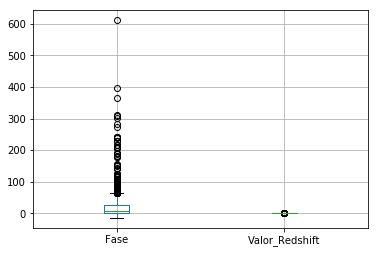

In [5]:
novo_Selecao = dataFrame_SN[['Tipo','Tag_Fase','Fase','Valor_Redshift']]
novo_Selecao = novo_Selecao.set_index(['Tipo'])#Tag_Fase agora é um indice

novo_Selecao.boxplot()

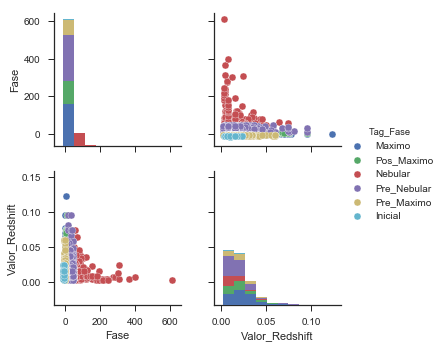

In [7]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(novo_Selecao, hue="Tag_Fase")

In [9]:
novo_Selecao = novo_Selecao.set_index(['Tag_Fase'])

inicial = novo_Selecao.loc['Inicial']
pre_max =novo_Selecao.loc['Pre_Maximo']#são fases parecidas
maximo = novo_Selecao.loc['Maximo']#são fases parecidas
pos_max = novo_Selecao.loc['Pos_Maximo']#são fases parecidas
pre_nebular = novo_Selecao.loc['Pre_Nebular']
nebular = novo_Selecao.loc['Nebular']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022ECDF80E80>,
      dtype=object)

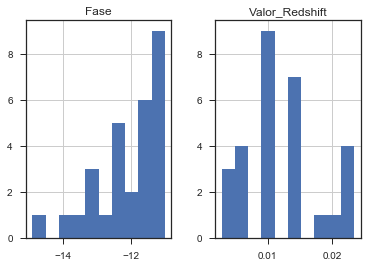

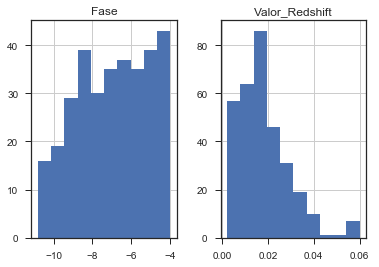

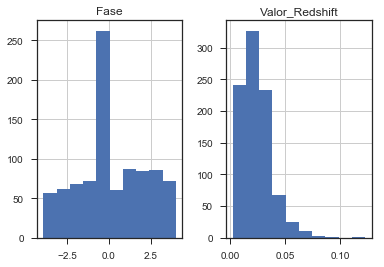

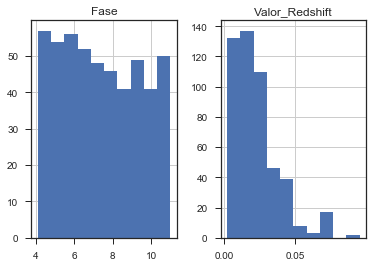

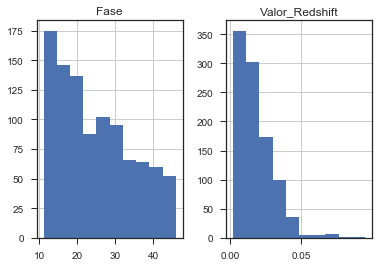

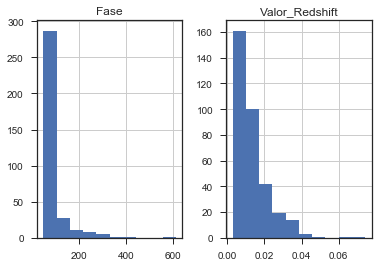

In [10]:
inicial.hist()
pre_max.hist()
maximo.hist()
pos_max.hist()
pre_nebular.hist()
nebular.hist()

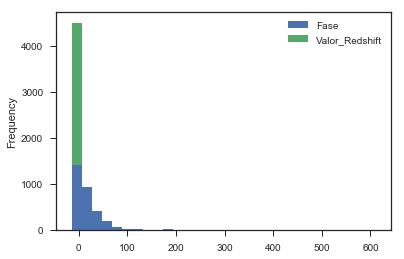

In [15]:
novo_Selecao.plot(kind='hist', stacked=True, bins=30)

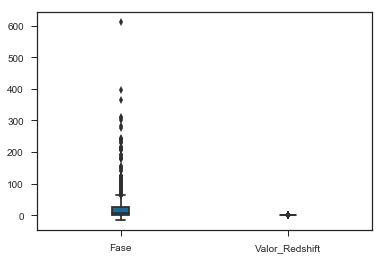

In [22]:
bplot=sns.boxplot(data=novo_Selecao, 
                 width=0.1,
                 palette="colorblind")